<a href="https://colab.research.google.com/github/prisqia/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'15yVOMdFHveoBT0XXd-Z_LP6ulBtInJkn'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Pencemaran_udara.xlsx') 

In [ ]:
#input data#
df=pd.read_excel("Pencemaran_udara.xlsx")
df

,No,pm10,so2,co,o3,no2
0,1,38,36,25,46,9
1,2,45,36,39,102,8
2,3,51,37,27,63,10
3,4,51,38,19,85,10
4,5,52,39,25,62,9
5,6,62,37,39,64,9
6,7,50,38,39,66,11
7,8,52,40,22,70,11
8,9,82,38,58,71,13
9,10,44,37,27,47,9


In [ ]:
print("Data Types:")
print(df.dtypes)

Data Types:
No      int64
pm10    int64
so2     int64
co      int64
o3      int64
no2     int64
dtype: object


In [ ]:
missing = df.isna().sum()
print(missing)

No      0
pm10    0
so2     0
co      0
o3      0
no2     0
dtype: int64


In [ ]:
#DATA PREPROCESSING (pemisahan atribut 31 titik dan parameter)#
df_label=df['No'] #Y (Dependent var--target)
df_atribut=df[['pm10', 'so2', 'co', 'o3', 'no2']] #X Independent var--atribut
#Normalisasi/standarisasi#
scale=StandardScaler()
std_atribut=scale.fit_transform(df_atribut)
std_atribut=pd.DataFrame(std_atribut,columns=df_atribut.columns)
std_atribut

,pm10,so2,co,o3,no2
0,-1.332266,0.178651,-0.554937,-1.270676,-0.759786
1,-0.825958,0.178651,0.544802,1.631815,-1.015801
2,-0.391980,0.351719,-0.397832,-0.389562,-0.503771
3,-0.391980,0.524788,-1.026254,0.750702,-0.503771
4,-0.319651,0.697856,-0.554937,-0.441393,-0.759786
5,0.403646,0.351719,0.544802,-0.337732,-0.759786
6,-0.464310,0.524788,0.544802,-0.234072,-0.247756
7,-0.319651,0.870924,-0.790596,-0.026751,-0.247756
8,1.850240,0.524788,2.037305,0.025079,0.264273
9,-0.898288,0.351719,-0.397832,-1.218845,-0.759786


In [ ]:
#Model Tuning#
distortions = []
K = range(1,15) #Metode Empiris k= akar (n/2)
for k in K:
  kmeanModel = KMeans(n_clusters=k,random_state=42)
  kmeanModel.fit(std_atribut)
  distortions.append(kmeanModel.inertia_)

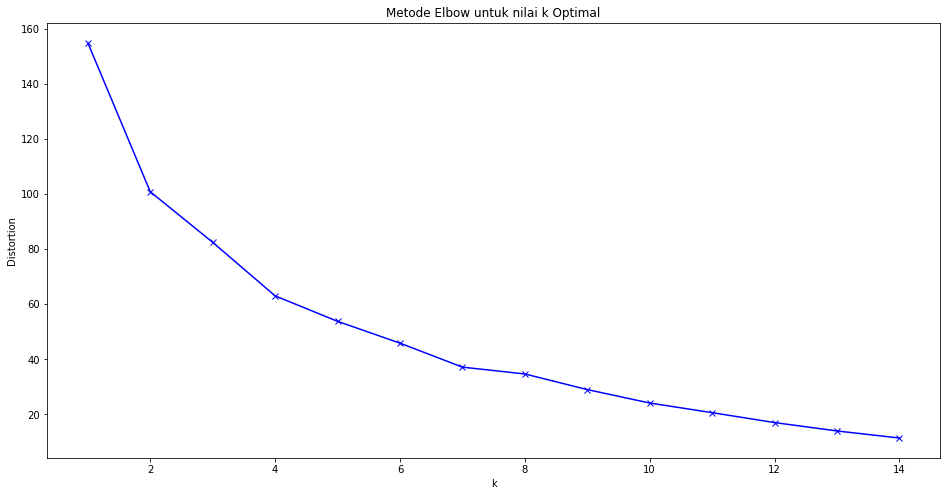

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Metode Elbow untuk nilai k Optimal')
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f55d4fc8898>,
                     model=None)

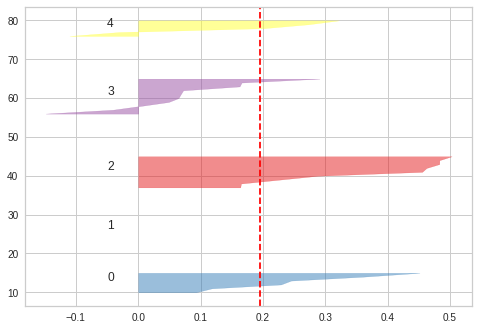

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")

visualizer.fit(std_atribut)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f55d4f77630>,
                     model=None)

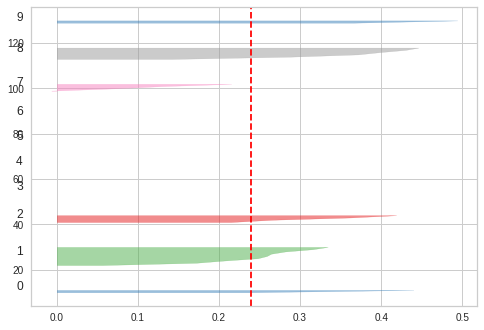

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(10, random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")

visualizer.fit(std_atribut)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f55d4e88080>,
                     model=None)

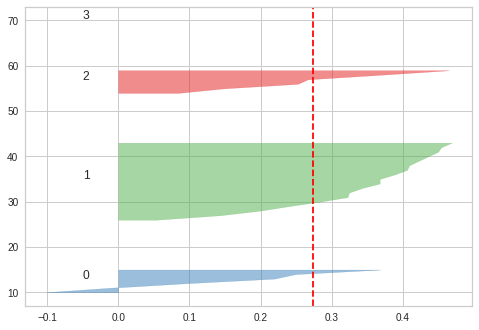

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")

visualizer.fit(std_atribut)

In [ ]:
kmeans = KMeans( init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42)
kmeans.fit(std_atribut)
print("inertia:", kmeans.inertia_)
print("cluster centroids:", kmeans.cluster_centers_)
prediksi=kmeans.predict(std_atribut)
clt=pd.Series(prediksi,name="Cluster")
kota_kab=pd.Series(df_label)
hasil=pd.concat([kota_kab,clt],axis=1)
hasil

inertia: 69.27478242675429
cluster centroids: [[ 1.40592908 -0.29110561  1.34155132  0.97283116  0.95917069]
 [-0.20598961 -0.68669021 -0.13972985 -0.32292358  0.84945006]
 [-0.77171107 -0.18911895 -0.92806319 -0.79772514 -0.98379884]
 [-0.24732086  0.92861359 -0.10980497  0.20360533 -0.53221716]]


,No,Cluster
0,1,2
1,2,3
2,3,3
3,4,3
4,5,3
5,6,3
6,7,3
7,8,3
8,9,0
9,10,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


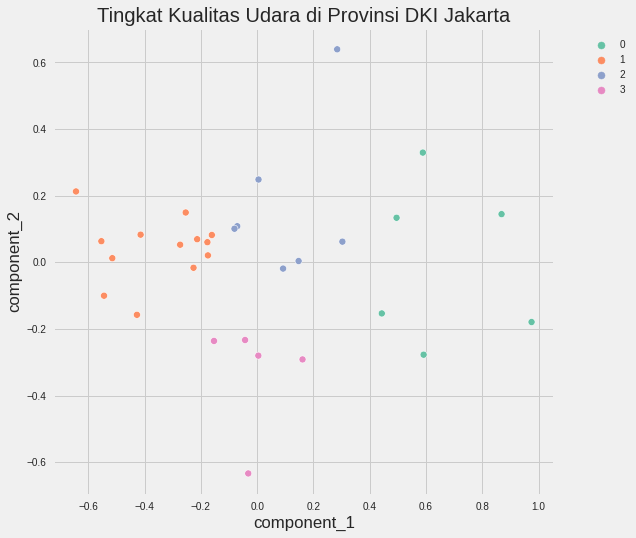

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", PCA(n_components=2, random_state=42)),])
clusterer = Pipeline([("kmeans", KMeans( n_clusters=4, init="k-means++",n_init=50,max_iter=500,random_state=42,),),])
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(df_atribut)

preprocessed_data = pipe["preprocessor"].transform(df_atribut)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

pcadf = pd.DataFrame(pipe["preprocessor"].transform(df_atribut),columns=["component_1", "component_2"],)
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot("component_1","component_2",s=50,data=pcadf, hue="predicted_cluster",palette="Set2",)
scat.set_title("Tingkat Kualitas Udara di Provinsi DKI Jakarta")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

In [ ]:
hasil.to_excel("Clustering.xlsx")